In [1]:
print("Hello")

Hello


In [4]:
! pip install pyyaml


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os

CONVERTING ALL YAML FILES INTO CSV FILE BASED ON THERE SYMBOLS

In [13]:
import yaml
import csv
import os
from collections import defaultdict

# Configuration - Update with all 13 YAML file paths
input_dirs = [
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2023-10",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2023-11",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2023-12",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-01",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-02",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-03",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-04",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-05",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-06",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-07",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-08",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-09",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-10",
    r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\2024-11",


    # Add paths for all 13 YAML directories here
]

output_dir = r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\combined_ticker_csvs"
os.makedirs(output_dir, exist_ok=True)

# Dictionary to store all data by ticker
ticker_data = defaultdict(list)

# Process each YAML file in all input directories
for input_dir in input_dirs:
    for filename in os.listdir(input_dir):
        if filename.endswith('.yaml') or filename.endswith('.yml'):
            filepath = os.path.join(input_dir, filename)
            try:
                with open(filepath, 'r') as file:
                    data = yaml.safe_load(file)
                    for entry in data:
                        ticker = entry['Ticker']
                        processed_entry = {
                            'date': entry['date'],
                            'open': entry['open'],
                            'high': entry['high'],
                            'low': entry['low'],
                            'close': entry['close'],
                            'volume': entry['volume'],
                            'month': entry.get('month', '')  # Handle missing month
                        }
                        ticker_data[ticker].append(processed_entry)
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")

# Write each ticker's data to a CSV file (50 CSVs)
for ticker, entries in ticker_data.items():
    csv_filename = os.path.join(output_dir, f"{ticker}.csv")
    entries.sort(key=lambda x: x['date'])  # Sort by date
    fieldnames = ['date', 'open', 'high', 'low', 'close', 'volume', 'month']
    with open(csv_filename, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(entries)

print(f"Processing complete. CSV files saved to: {output_dir}")
print(f"Total tickers processed: {len(ticker_data)}")


Processing complete. CSV files saved to: C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\combined_ticker_csvs
Total tickers processed: 50


MERGING OF CONVERTED CSV FILES INTO A SINGLE FILE FOR THE PURPOSE OF DATA CLEANING

In [14]:
import os
import pandas as pd

# Define paths
input_folder = 'data/combined_ticker_csvs'
output_file = 'data/combined_stocks.csv'  # Output file path

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Get all CSV files in the directory
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

if not csv_files:
    print(f"No CSV files found in {input_folder}")
else:
    print(f"Found {len(csv_files)} CSV files to combine")

    # Initialize list to store DataFrames
    dfs = []

    # Process each CSV file
    for file in csv_files:
        file_path = os.path.join(input_folder, file)
        try:
            # Read CSV and add ticker column from filename
            ticker = os.path.splitext(file)[0]
            df = pd.read_csv(file_path)
            df['Ticker'] = ticker  # Add source identifier
            dfs.append(df)
            print(f"Processed: {file}")
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    if dfs:
        # Combine all DataFrames
        combined_df = pd.concat(dfs, ignore_index=True)
        
        # Save to output file
        combined_df.to_csv(output_file, index=False)
        print(f"\nSuccessfully combined {len(dfs)} files into {output_file}")
        print(f"Total rows: {len(combined_df)}")
        print(f"Columns: {list(combined_df.columns)}")
    else:
        print("No valid CSV files could be processed")

Found 50 CSV files to combine
Processed: ADANIENT.csv
Processed: ADANIPORTS.csv
Processed: APOLLOHOSP.csv
Processed: ASIANPAINT.csv
Processed: AXISBANK.csv
Processed: BAJAJ-AUTO.csv
Processed: BAJAJFINSV.csv
Processed: BAJFINANCE.csv
Processed: BEL.csv
Processed: BHARTIARTL.csv
Processed: BPCL.csv
Processed: BRITANNIA.csv
Processed: CIPLA.csv
Processed: COALINDIA.csv
Processed: DRREDDY.csv
Processed: EICHERMOT.csv
Processed: GRASIM.csv
Processed: HCLTECH.csv
Processed: HDFCBANK.csv
Processed: HDFCLIFE.csv
Processed: HEROMOTOCO.csv
Processed: HINDALCO.csv
Processed: HINDUNILVR.csv
Processed: ICICIBANK.csv
Processed: INDUSINDBK.csv
Processed: INFY.csv
Processed: ITC.csv
Processed: JSWSTEEL.csv
Processed: KOTAKBANK.csv
Processed: LT.csv
Processed: M&M.csv
Processed: MARUTI.csv
Processed: NESTLEIND.csv
Processed: NTPC.csv
Processed: ONGC.csv
Processed: POWERGRID.csv
Processed: RELIANCE.csv
Processed: SBILIFE.csv
Processed: SBIN.csv
Processed: SHRIRAMFIN.csv
Processed: SUNPHARMA.csv
Process

DISPLAYING OF DATA BASE FOR CLEANING PURPOSE

In [19]:
df=pd.read_csv("data/combined_stocks.csv")
df

,date,open,high,low,close,volume,month,Ticker
0,2023-10-03 05:30:00,2418.00,2424.90,2372.00,2387.25,2019899,2023-10,ADANIENT
1,2023-10-04 05:30:00,2402.20,2502.75,2392.25,2464.95,2857377,2023-10,ADANIENT
2,2023-10-05 05:30:00,2477.95,2486.50,2446.40,2466.35,1132455,2023-10,ADANIENT
3,2023-10-06 05:30:00,2466.35,2514.95,2466.05,2478.10,1510035,2023-10,ADANIENT
4,2023-10-09 05:30:00,2440.00,2459.70,2411.30,2442.60,1408224,2023-10,ADANIENT
...,...,...,...,...,...,...,...,...
14195,2024-11-14 05:30:00,568.95,574.55,564.20,566.70,4891760,2024-11,WIPRO
14196,2024-11-18 05:30:00,566.70,566.70,540.30,552.85,7644882,2024-11,WIPRO
14197,2024-11-19 05:30:00,556.00,569.80,554.70,562.00,6459889,2024-11,WIPRO
14198,2024-11-21 05:30:00,562.00,567.60,555.30,557.15,5836304,2024-11,WIPRO


Shape Function is used to check number of rows and column in the dataset

In [22]:
df.shape

(14200, 8)

Below Function is to display the column name and there data type

In [23]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'month', 'Ticker'], dtype='object')

Below function Identify data types 

In [24]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
month      object
Ticker     object
dtype: object

Below function is to Check for missing values

In [ ]:
df.isnull().sum()#No missing value 

date      0
open      0
high      0
low       0
close     0
volume    0
month     0
Ticker    0
dtype: int64

Below function is to check for duplicates

In [26]:
df.duplicated().sum()

np.int64(0)

Analysis

 1.Volatility Analysis:

Calculate daily returns for each stock

In [15]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\combined_stocks.csv")
 
# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])
 
# Sort by stock and date
df = df.sort_values(by=['Ticker', 'date'])
 
# Calculate daily return
df['PreviousClose'] = df.groupby('Ticker')['close'].shift(1)
df['DailyReturn'] = (df['close'] - df['PreviousClose']) / df['PreviousClose']
 
# Optional: Save to a new CSV
#df.to_csv("merged_with_returns.csv", index=False)
 
# Preview
print(df)
 

                     date     open     high      low    close   volume  \
0     2023-10-03 05:30:00  2418.00  2424.90  2372.00  2387.25  2019899   
1     2023-10-04 05:30:00  2402.20  2502.75  2392.25  2464.95  2857377   
2     2023-10-05 05:30:00  2477.95  2486.50  2446.40  2466.35  1132455   
3     2023-10-06 05:30:00  2466.35  2514.95  2466.05  2478.10  1510035   
4     2023-10-09 05:30:00  2440.00  2459.70  2411.30  2442.60  1408224   
...                   ...      ...      ...      ...      ...      ...   
14195 2024-11-14 05:30:00   568.95   574.55   564.20   566.70  4891760   
14196 2024-11-18 05:30:00   566.70   566.70   540.30   552.85  7644882   
14197 2024-11-19 05:30:00   556.00   569.80   554.70   562.00  6459889   
14198 2024-11-21 05:30:00   562.00   567.60   555.30   557.15  5836304   
14199 2024-11-22 05:30:00   561.95   573.60   557.90   571.65  7366616   

         month    Ticker  Daily_Return  PreviousClose  DailyReturn  
0      2023-10  ADANIENT           NaN    

Compute the standard deviation of daily returns for each stock to measure volatility.


In [20]:
import pandas as pd
 
# Load the CSV with daily returns (or from scratch)
df = pd.read_csv(r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\combined_stocks.csv")
 
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])
 
# Sort for consistency
df = df.sort_values(by=['Ticker', 'date'])
 
# Calculate Previous Close and Daily Return
df['PreviousClose'] = df.groupby('Ticker')['close'].shift(1)
df['DailyReturn'] = (df['close'] - df['PreviousClose']) / df['PreviousClose']
 
# Drop rows with NaN DailyReturn (first row per stock)
df = df.dropna(subset=['DailyReturn'])
 
# Calculate Volatility (std of daily returns) per stock
volatility_df = df.groupby('Ticker')['DailyReturn'].std().reset_index()
volatility_df.columns = ['Ticker', 'Volatility']
 
# Save or display
#volatility_df.to_csv("stock_volatility.csv", index=False)
print(volatility_df.head())
 

       Ticker  Volatility
0    ADANIENT    0.028601
1  ADANIPORTS    0.026029
2  APOLLOHOSP    0.014135
3  ASIANPAINT    0.012665
4    AXISBANK    0.015625


Plot a bar chart showing the volatility of the top 10 most volatile stocks over the year

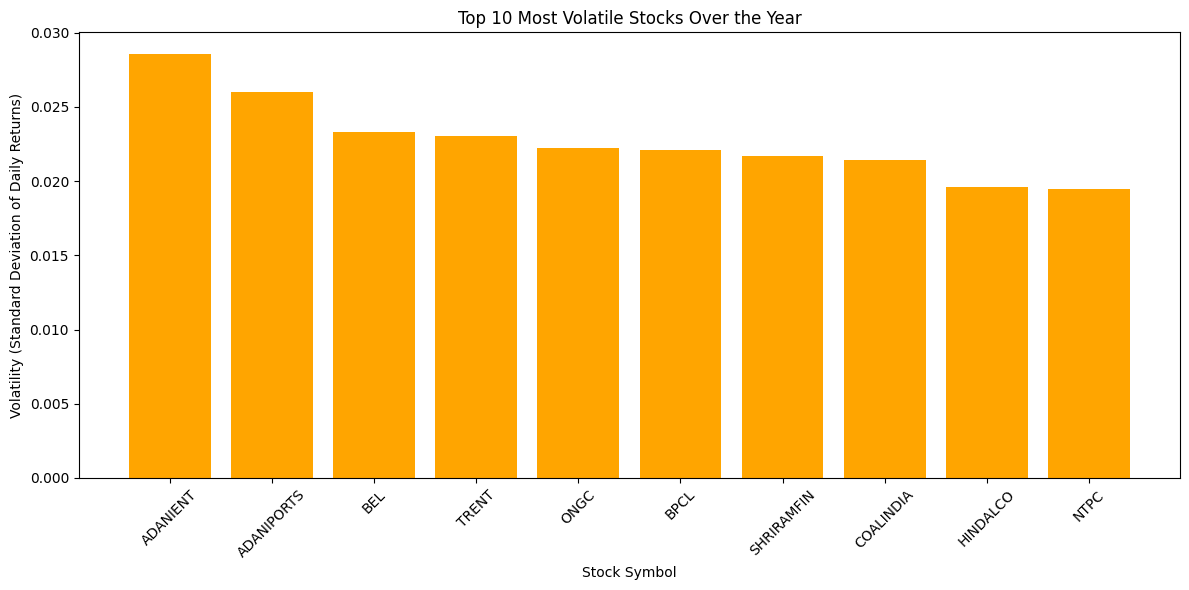

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the data
df = pd.read_csv(r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\combined_stocks.csv")
 
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
 
# Sort by Ticker and Date
df = df.sort_values(by=['Ticker', 'date'])
 
# Calculate Previous Close and Daily Return
df['PreviousClose'] = df.groupby('Ticker')['close'].shift(1)
df['DailyReturn'] = (df['close'] - df['PreviousClose']) / df['PreviousClose']
 
# Drop missing returns
df = df.dropna(subset=['DailyReturn'])
 
# Calculate volatility (standard deviation of daily returns)
volatility_df = df.groupby('Ticker')['DailyReturn'].std().reset_index()
volatility_df.columns = ['StockSymbol', 'Volatility']
 
# Get Top 10 most volatile stocks
top10_volatility = volatility_df.sort_values(by='Volatility', ascending=False).head(10)
 
# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top10_volatility['StockSymbol'], top10_volatility['Volatility'], color='orange')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.title('Top 10 Most Volatile Stocks Over the Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 
 

2.Cumulative Return Over Time:


In [25]:
import pandas as pd
 
# Load your dataset
df = pd.read_csv(r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\combined_stocks.csv")
 
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
 
# Sort by Ticker and date
df = df.sort_values(by=['Ticker', 'date'])
 
# Calculate previous close and daily return
df['PreviousClose'] = df.groupby('Ticker')['close'].shift(1)
df['DailyReturn'] = (df['close'] - df['PreviousClose']) / df['PreviousClose']
 
# Drop rows with missing DailyReturn
df = df.dropna(subset=['DailyReturn'])
 
# Calculate cumulative return using transform (preserves DataFrame alignment)
df['CumulativeReturn'] = df.groupby('Ticker')['DailyReturn'].transform(lambda x: (1 + x).cumprod() - 1)
 
# Save to new file if needed
#df.to_csv("merged_with_cumulative_returns.csv", index=False)
 
# Display a preview
print(df[['Ticker', 'date', 'close', 'DailyReturn', 'CumulativeReturn']].head())

     Ticker                date    close  DailyReturn  CumulativeReturn
1  ADANIENT 2023-10-04 05:30:00  2464.95     0.032548          0.032548
2  ADANIENT 2023-10-05 05:30:00  2466.35     0.000568          0.033134
3  ADANIENT 2023-10-06 05:30:00  2478.10     0.004764          0.038056
4  ADANIENT 2023-10-09 05:30:00  2442.60    -0.014325          0.023186
5  ADANIENT 2023-10-10 05:30:00  2498.30     0.022804          0.046518


Plot a line chart for the top 5 performing stocks (based on cumulative return) over the course of the year.


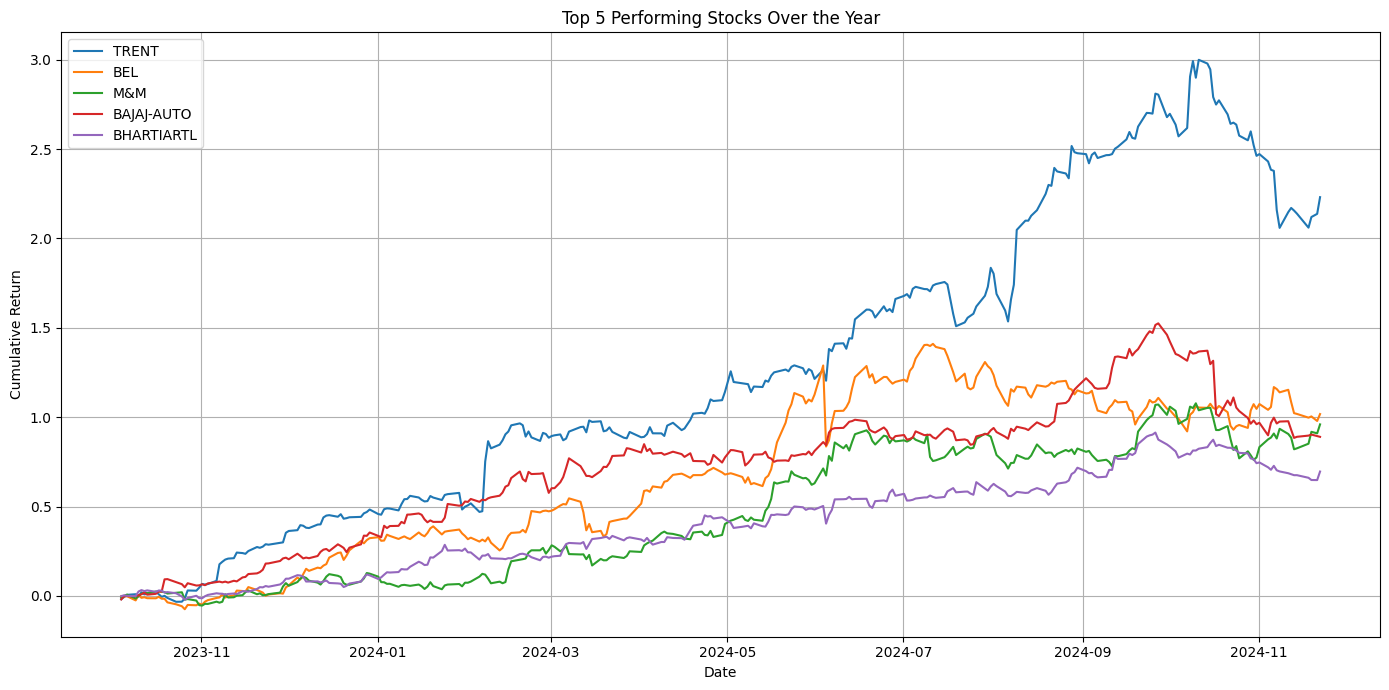

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset
df = pd.read_csv(r"C:\Users\sowmiya\OneDrive\Desktop\Stock project\data\combined_stocks.csv")
 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
 
# Sort by stock and date
df = df.sort_values(by=['Ticker', 'date'])
 
# Calculate daily return
df['PreviousClose'] = df.groupby('Ticker')['close'].shift(1)
df['DailyReturn'] = (df['close'] - df['PreviousClose']) / df['PreviousClose']
df = df.dropna(subset=['DailyReturn'])
 
# Calculate cumulative return
df['CumulativeReturn'] = df.groupby('Ticker')['DailyReturn'].transform(lambda x: (1 + x).cumprod() - 1)
 
# Get last cumulative return per stock
final_returns = df.groupby('Ticker').tail(1)[['Ticker', 'CumulativeReturn']]
top5_tickers = final_returns.sort_values(by='CumulativeReturn', ascending=False).head(5)['Ticker'].tolist()
 
# Filter for top 5 stocks
top5_df = df[df['Ticker'].isin(top5_tickers)]
 
# Plot
plt.figure(figsize=(14, 7))
for ticker in top5_tickers:
    subset = top5_df[top5_df['Ticker'] == ticker]
    plt.plot(subset['date'], subset['CumulativeReturn'], label=ticker)
 
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Top 5 Performing Stocks Over the Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
 
 

3. Sector-wise Performance:

Calculate the average yearly return for each sector.

In [6]:
import pandas as pd

# Load your files
merged_df = pd.read_csv("data/combined_stocks.csv")
sector_df = pd.read_csv("data/Sector_data - Sheet1.csv")

# Extract ticker from 'Symbol' column (everything after colon)
sector_df['Ticker'] = sector_df['Symbol'].str.extract(r':\s*([A-Z\-\&]+)')

# Create mapping using partial string match
ticker_to_sector = {}

for ticker in merged_df['Ticker'].unique():
    match = None
    for _, row in sector_df.iterrows():
        if ticker in row['Symbol']:
            match = row['sector']
            break
    ticker_to_sector[ticker] = match

# Map the sector column
merged_df['sector'] = merged_df['Ticker'].map(ticker_to_sector)

# Manually patch missing or incorrect entries
manual_fixes = {
    "ADANIENT": "MISCELLANEOUS",
    "BHARTIARTL": "TELECOM"
}

for ticker, sector in manual_fixes.items():
    merged_df.loc[merged_df['Ticker'] == ticker, 'sector'] = sector

# Save the updated file
merged_df.to_csv("sectorwise_data.csv", index=False)

print("✅ Sector column added and missing values patched")


✅ Sector column added and missing values patched


In [7]:
merged_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'month', 'Ticker',
       'Daily_Return', 'sector'],
      dtype='object')

In [8]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("sectorwise_data.csv")

# Group by Sector and Year, then calculate mean return per year (if multiple rows per year)
yearly_returns = df.groupby(['sector', 'month'])['close'].mean().reset_index()

# Now, calculate the average yearly return per sector
avg_yearly_return_per_sector = yearly_returns.groupby('sector')['close'].mean().reset_index()

# Optional: rename the column for clarity
avg_yearly_return_per_sector.columns = ['sector', 'Average_Yearly_Return']

# Print the results
print(avg_yearly_return_per_sector)

             sector  Average_Yearly_Return
0         ALUMINIUM             608.785236
1       AUTOMOBILES            5395.778914
2           BANKING            1294.788409
3            CEMENT           10267.254197
4           DEFENCE             234.120827
5            ENERGY             643.379932
6           FINANCE            3769.594457
7              FMCG            1801.926814
8    FOOD & TOBACCO            1469.456450
9         INSURANCE            1085.349091
10           MINING             434.599479
11    MISCELLANEOUS            3470.370967
12           PAINTS            3009.293654
13  PHARMACEUTICALS            1398.176959
14            POWER             316.868211
15        RETAILING            4088.357204
16         SOFTWARE            2081.129543
17            STEEL             512.427286
18          TELECOM            1296.223541
19         TEXTILES            2355.090896


Plot a bar chart showing the average performance for each sector.


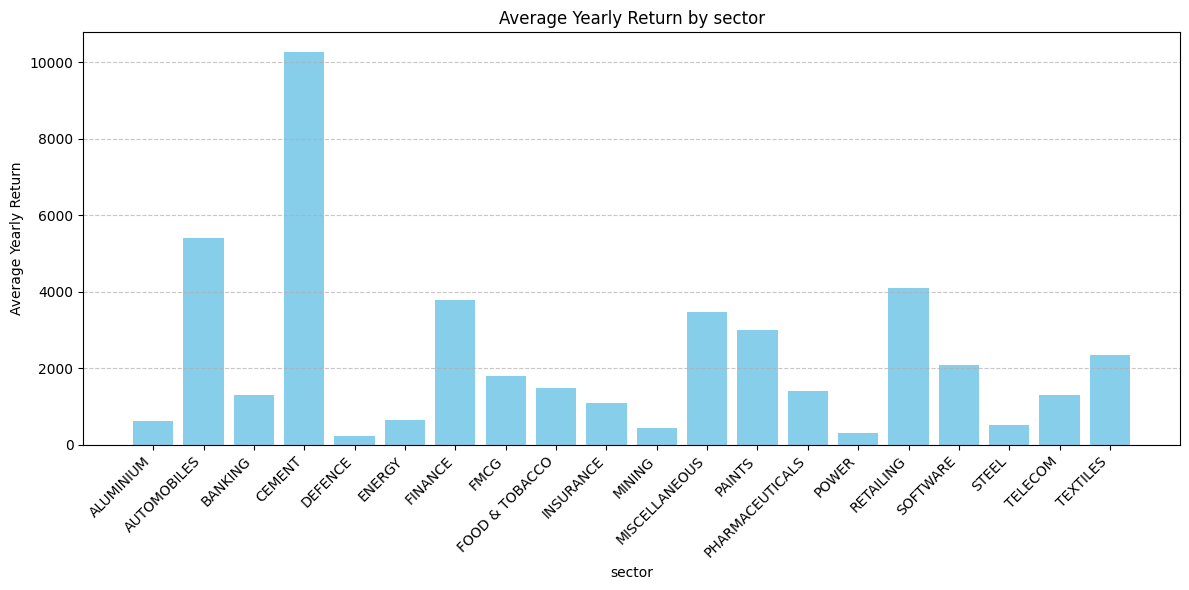

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("sectorwise_data.csv")

# Group by Sector and Year to get yearly returns if needed
yearly_returns = df.groupby(['sector', 'month'])['close'].mean().reset_index()

# Calculate average yearly return per sector
avg_returns = yearly_returns.groupby('sector')['close'].mean().reset_index()
avg_returns.columns = ['sector', 'Average_Yearly_Return']

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_returns['sector'], avg_returns['Average_Yearly_Return'], color='skyblue')
plt.xlabel('sector')
plt.ylabel('Average Yearly Return')
plt.title('Average Yearly Return by sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


4.Stock Price Correlation

correlation coefficient

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/combined_stocks.csv")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort data
df = df.sort_values(by=['Ticker', 'date'])

# Calculate daily return (% change)
df['DailyReturn'] = df.groupby('Ticker')['close'].pct_change()

# Pivot to wide format: rows = date, columns = stock tickers
pivot_returns = df.pivot(index='date', columns='Ticker', values='DailyReturn')

# Drop rows with missing values (optional for clean matrix)
pivot_returns = pivot_returns.dropna()

# Calculate correlation matrix
correlation_matrix = pivot_returns.corr()

# Save to CSV if needed
#correlation_matrix.to_csv("stock_correlation_matrix.csv")

# Display a sample
print(correlation_matrix.round(2))

Ticker      ADANIENT  ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  \
Ticker                                                               
ADANIENT        1.00        0.87        0.14        0.29      0.30   
ADANIPORTS      0.87        1.00        0.17        0.27      0.38   
APOLLOHOSP      0.14        0.17        1.00        0.26      0.18   
ASIANPAINT      0.29        0.27        0.26        1.00      0.13   
AXISBANK        0.30        0.38        0.18        0.13      1.00   
BAJAJ-AUTO      0.20        0.20        0.22        0.17      0.20   
BAJAJFINSV      0.36        0.40        0.25        0.25      0.39   
BAJFINANCE      0.34        0.40        0.22        0.30      0.35   
BEL             0.52        0.59        0.22        0.16      0.33   
BHARTIARTL      0.28        0.32        0.24        0.15      0.24   
BPCL            0.46        0.50        0.17        0.22      0.22   
BRITANNIA       0.13        0.13        0.23        0.43      0.13   
CIPLA           0.09

Plot a heatmap of the correlation matrix 

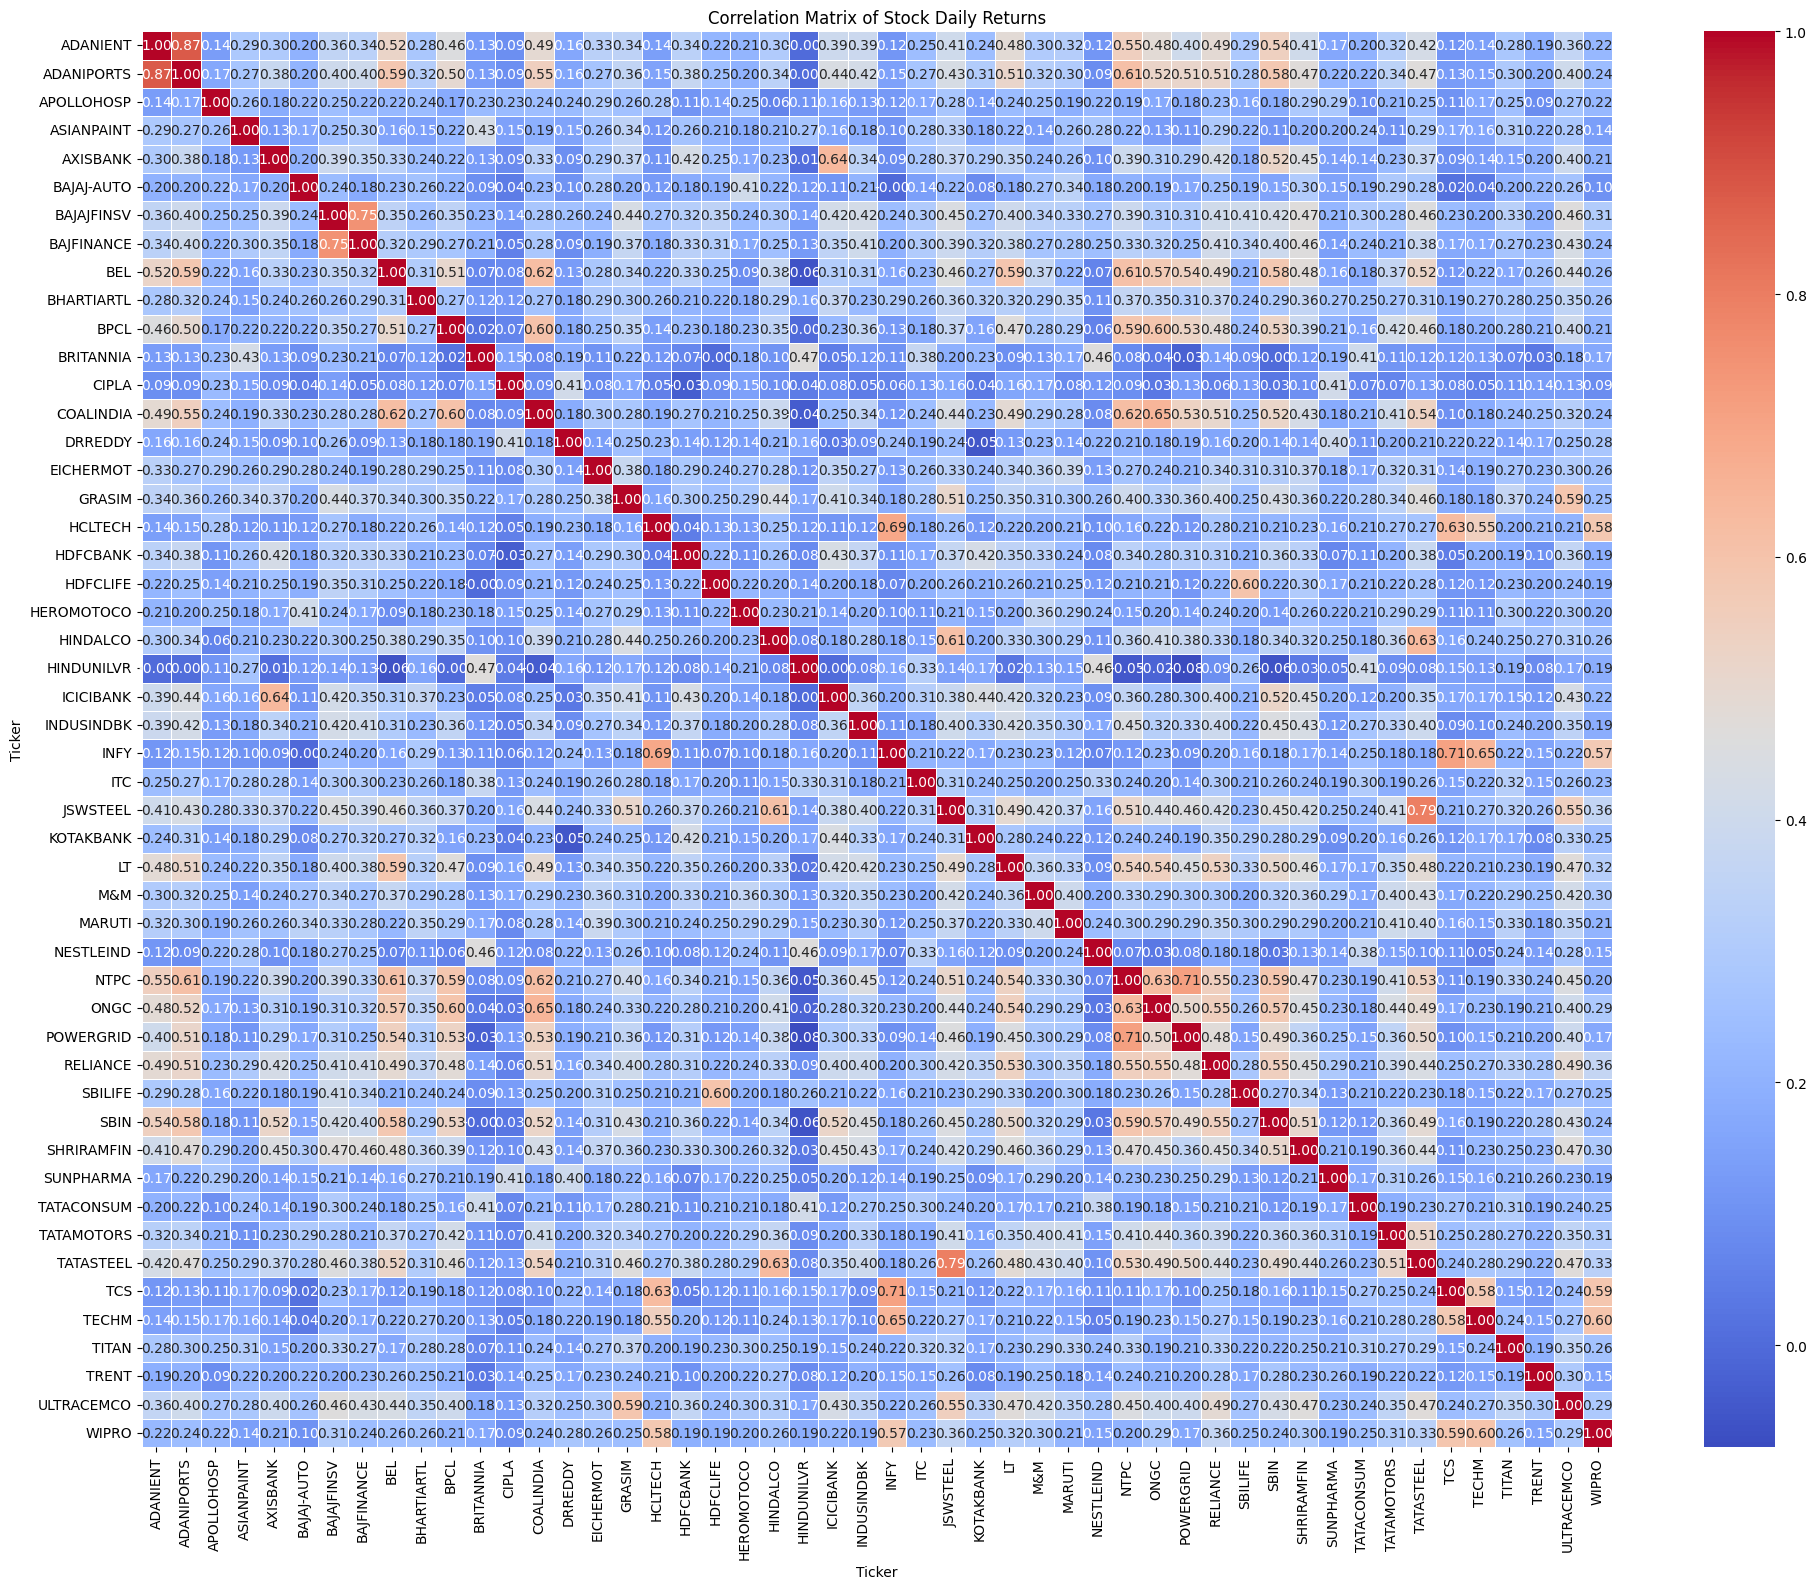

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data/combined_stocks.csv")

# Convert 'date' to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['Ticker', 'date'])

# Calculate daily percentage return
df['DailyReturn'] = df.groupby('Ticker')['close'].pct_change()

# Pivot the DataFrame: date as index, Ticker as columns, values = daily return
pivot_returns = df.pivot(index='date', columns='Ticker', values='DailyReturn').dropna()

# Compute the correlation matrix
correlation_matrix = pivot_returns.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Stock Daily Returns")
plt.tight_layout()
plt.show()

5. Top 5 Gainers and Losers (Month-wise

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Load the data
df = pd.read_csv('data/combined_stocks.csv')

# Convert date to datetime and extract year-month
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

# Calculate monthly performance for each stock
monthly_perf = df.groupby(['Ticker', 'year_month']).agg(
    start_price=('open', 'first'),
    end_price=('close', 'last'),
    high=('high', 'max'),
    low=('low', 'min')
).reset_index()

monthly_perf['monthly_return'] = ((monthly_perf['end_price'] - monthly_perf['start_price']) / monthly_perf['start_price']) * 100
monthly_perf['monthly_high_low'] = ((monthly_perf['high'] - monthly_perf['low']) / monthly_perf['low']) * 100

# Get all unique months in the data
unique_months = monthly_perf['year_month'].unique()

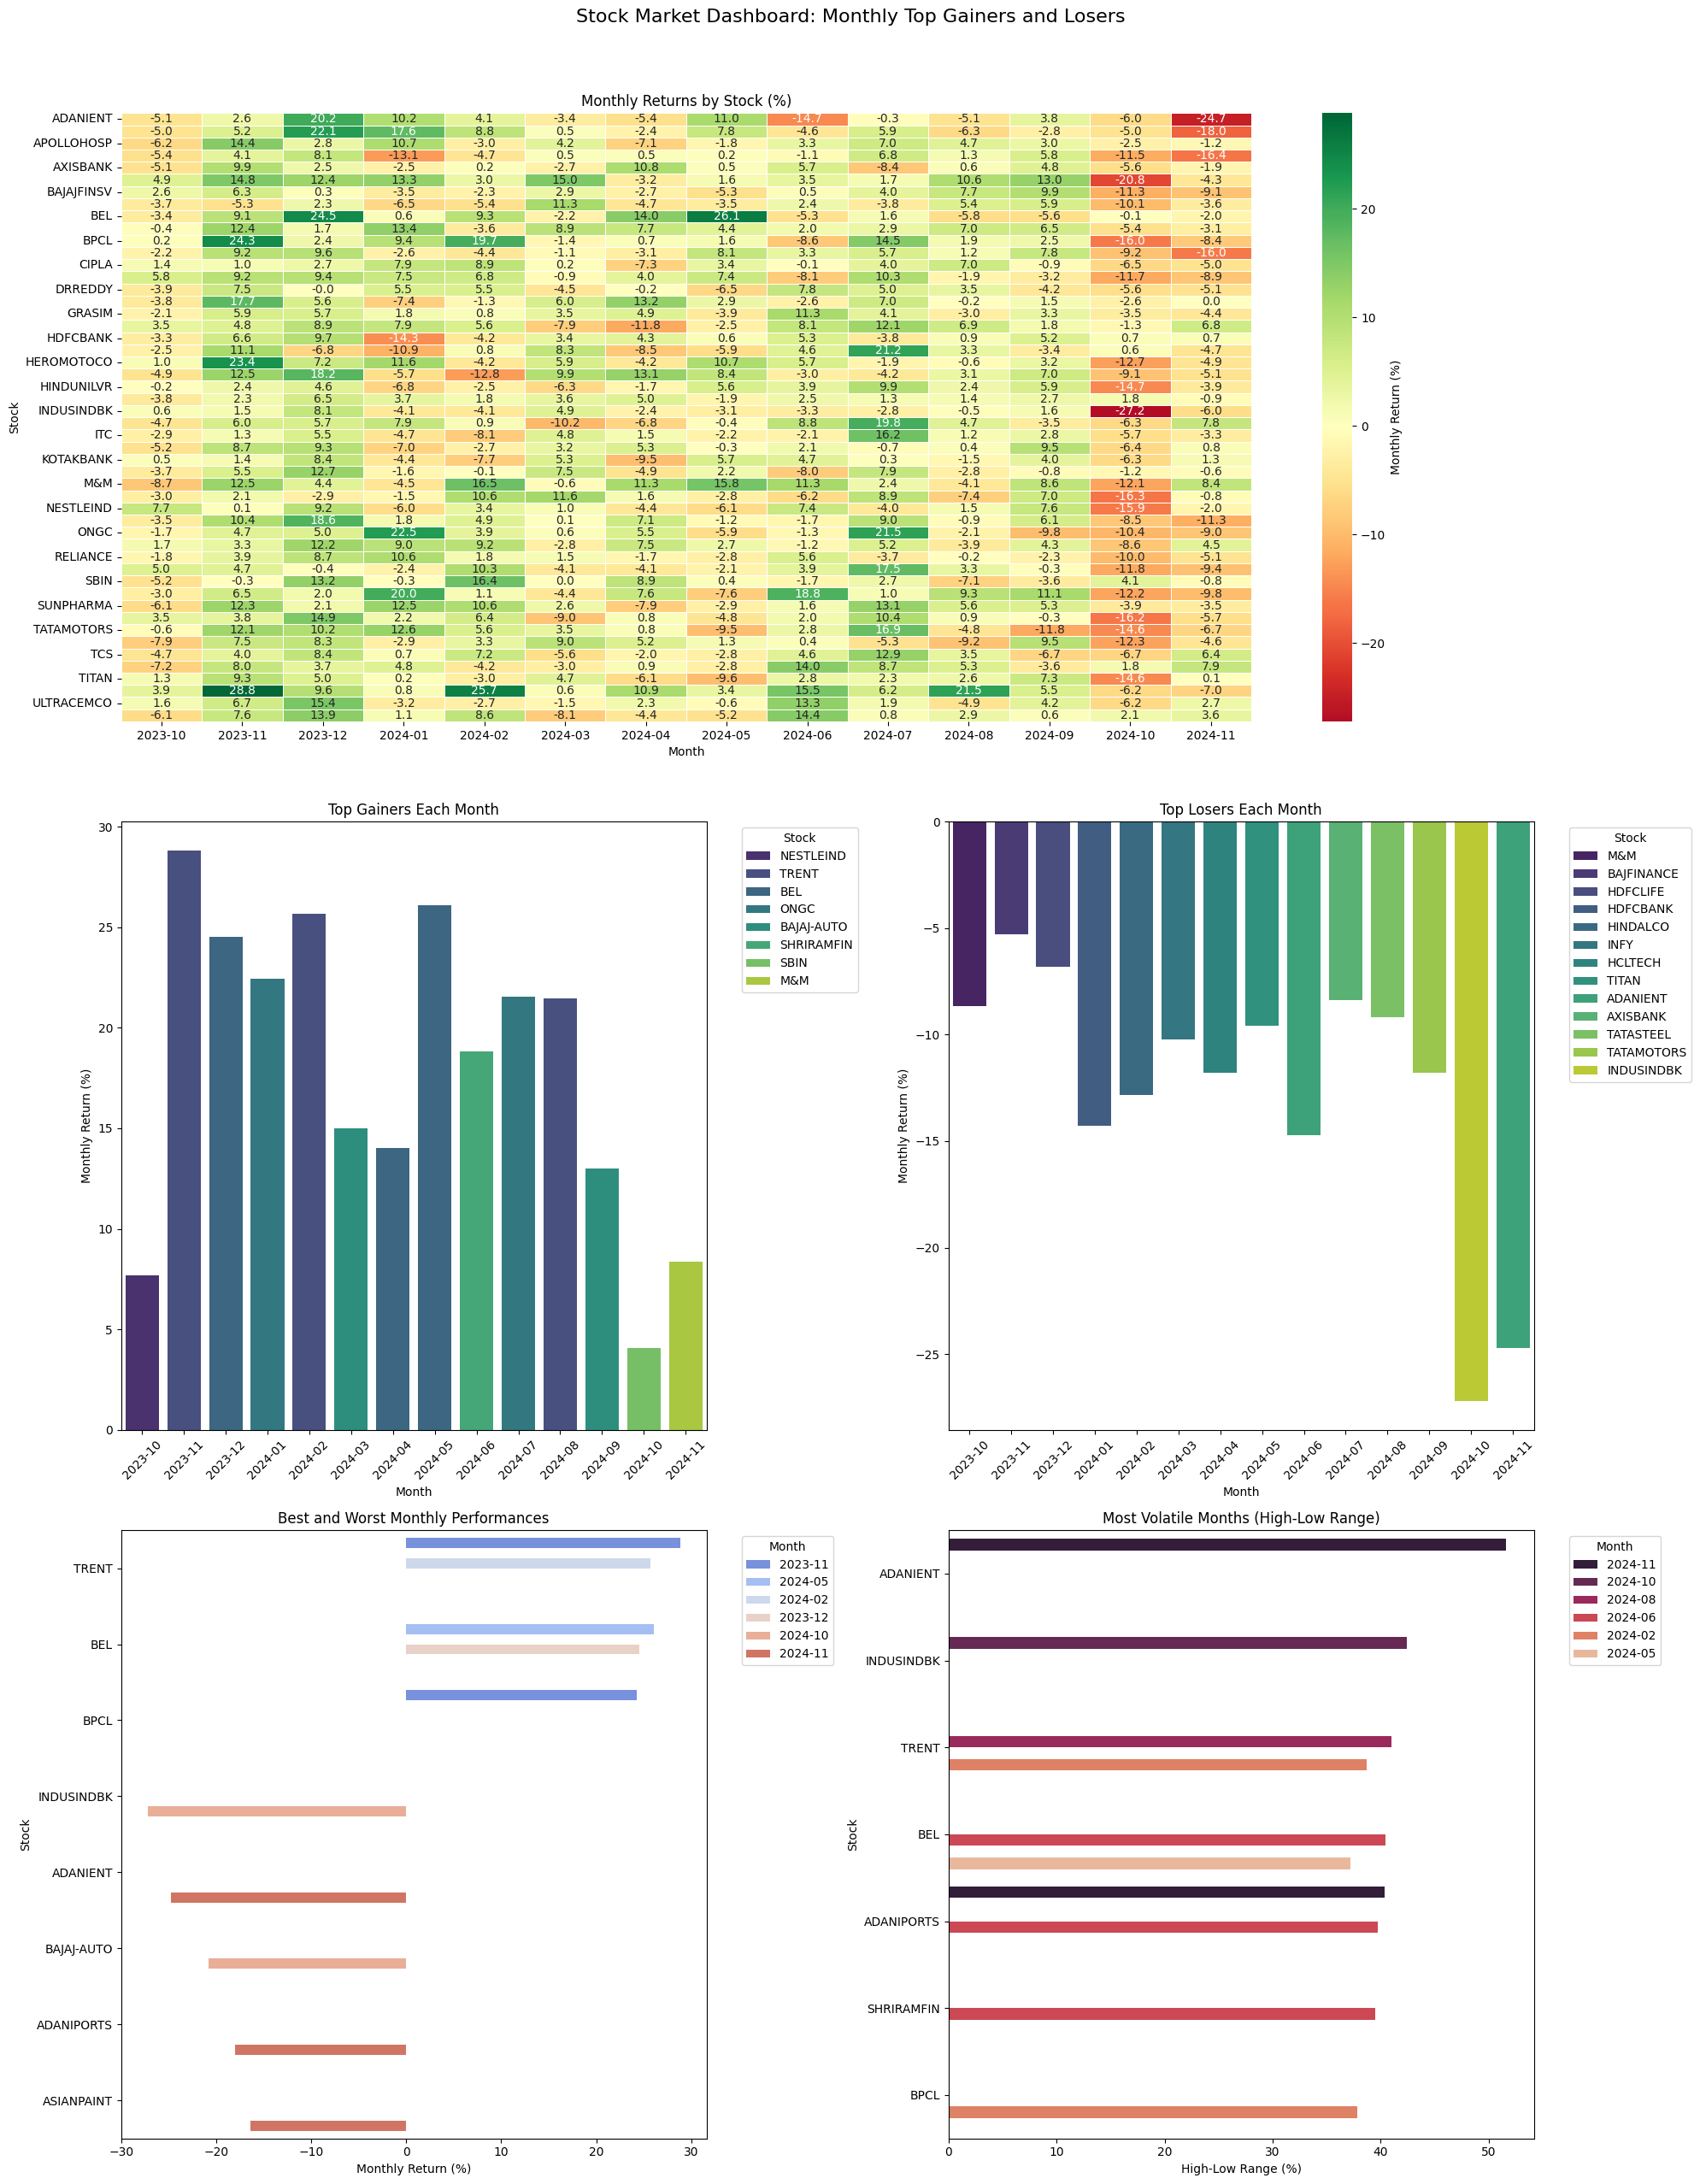

In [14]:
plt.figure(figsize=(20, 25))
plt.suptitle('Stock Market Dashboard: Monthly Top Gainers and Losers', fontsize=16, y=1.02)

# Create grid layout
gs = GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])

# Chart 1: Monthly Performance Heatmap
plt.subplot(gs[0, :])
heatmap_data = monthly_perf.pivot(index='Ticker', columns='year_month', values='monthly_return')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="RdYlGn", center=0, 
            linewidths=.5, cbar_kws={'label': 'Monthly Return (%)'})
plt.title('Monthly Returns by Stock (%)')
plt.xlabel('Month')
plt.ylabel('Stock')

# Chart 2: Top Gainers by Month
plt.subplot(gs[1, 0])
top_gainers = monthly_perf.loc[monthly_perf.groupby('year_month')['monthly_return'].idxmax()]
sns.barplot(data=top_gainers, x='year_month', y='monthly_return', hue='Ticker', palette='viridis')
plt.title('Top Gainers Each Month')
plt.xlabel('Month')
plt.ylabel('Monthly Return (%)')
plt.xticks(rotation=45)
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')

# Chart 3: Top Losers by Month
plt.subplot(gs[1, 1])
top_losers = monthly_perf.loc[monthly_perf.groupby('year_month')['monthly_return'].idxmin()]
sns.barplot(data=top_losers, x='year_month', y='monthly_return', hue='Ticker', palette='viridis')
plt.title('Top Losers Each Month')
plt.xlabel('Month')
plt.ylabel('Monthly Return (%)')
plt.xticks(rotation=45)
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')

# Chart 4: Best and Worst Monthly Performances
plt.subplot(gs[2, 0])
best_worst = pd.concat([
    monthly_perf.nlargest(5, 'monthly_return'),
    monthly_perf.nsmallest(5, 'monthly_return')
])
sns.barplot(data=best_worst, x='monthly_return', y='Ticker', hue='year_month', 
            palette='coolwarm', orient='h')
plt.title('Best and Worst Monthly Performances')
plt.xlabel('Monthly Return (%)')
plt.ylabel('Stock')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Chart 5: Volatility Analysis (High-Low Range)
plt.subplot(gs[2, 1])
volatile_stocks = monthly_perf.nlargest(10, 'monthly_high_low')
sns.barplot(data=volatile_stocks, x='monthly_high_low', y='Ticker', hue='year_month', 
            palette='rocket', orient='h')
plt.title('Most Volatile Months (High-Low Range)')
plt.xlabel('High-Low Range (%)')
plt.ylabel('Stock')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()